In [4]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer
word = SnowballStemmer('english')
import pandas as pd

Reading the data

In [84]:
df1 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\1.csv")
df2 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\2.csv")
df3 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\3.csv")
df4 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\4.csv")
df5 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\5.csv")
df6 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\6.csv")
df7 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\7.csv")
df8 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\8.csv")
df9 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\9.csv")
df10 =  pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\10.csv")
l = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]

Implemented/Tried some natural language processing, (NLP)

In [9]:
def transformed_text(text):
    text = nltk.word_tokenize(text)
    count = 0
    for i in text:
        text[count] = i.lower()
        text[count] = word.stem(str(i))
        count = count + 1
        if i in string.punctuation:
            text.remove(i)
    # for i in text:
    #     if i in stopwords.words('english'):
    #         text.remove(i)
        
    
    return " ".join(text)

In [10]:
df1['trans_text'] = df1['text'].apply(transformed_text)

In [11]:
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [12]:
df1['num_sentences'] = df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

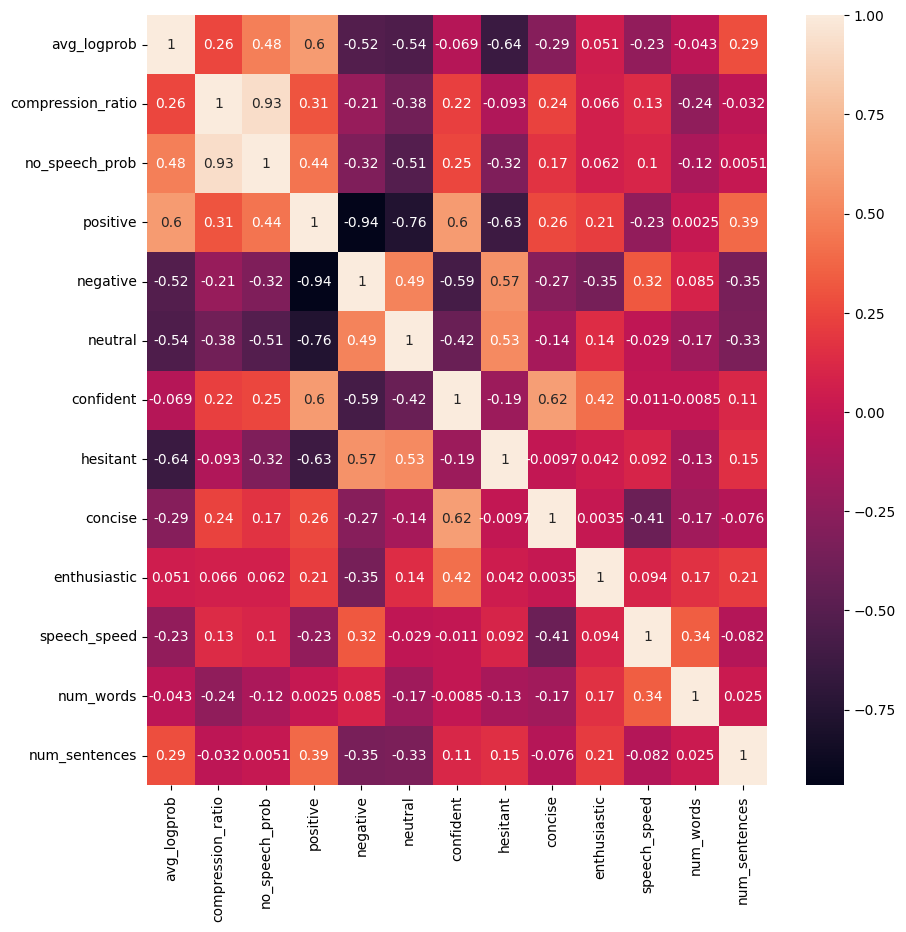

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df1.select_dtypes(include=[int,float]).iloc[:,5:].corr(),annot = True)


In [85]:
df1.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,5.56,"Hello, I am Jeffrey Shepherd and I am current...","[50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...",0.0,-0.447179,1.651235,0.63588,0.580265,0.152281,0.267454,0.846701,0.845698,0.635805,0.647783,2.517986
1,1,0,5.56,9.60,IIM Coikode. I have completed my B.Tech in Bi...,"[50642, 286, 6324, 3066, 1035, 1429, 13, 286, ...",0.0,-0.447179,1.651235,0.63588,0.550327,0.189263,0.260410,0.679283,0.733701,0.544145,0.417390,3.217822
2,2,0,9.60,14.48,"Technology Kolkata, followed by my M.Tech fro...","[50844, 15037, 26137, 74, 3274, 11, 6263, 538,...",0.0,-0.447179,1.651235,0.63588,0.639860,0.111150,0.248990,0.902729,0.834620,0.715861,0.700062,2.868852
3,3,0,14.48,18.48,of three years in the regulatory affairs doma...,"[51088, 295, 1045, 924, 294, 264, 18260, 17478...",0.0,-0.447179,1.651235,0.63588,0.441894,0.399186,0.158919,0.774308,0.813044,0.522462,0.279916,3.750000
4,4,0,18.48,23.28,"as a medical writer in Ciro Klein Farm, Mumba...","[51288, 382, 257, 4625, 9936, 294, 383, 5182, ...",0.0,-0.447179,1.651235,0.63588,0.236254,0.532010,0.231735,0.286049,0.561375,0.334381,0.197305,3.541667


In [27]:
df1.describe()

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,num_words,num_sentences
count,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,8.500000,3009.333333,41.002222,45.931111,0.0,-0.306962,1.666544,0.748891,0.709199,0.141214,0.149586,0.733828,0.485172,0.429418,0.466497,3.113771,16.222222,1.666667
std,5.338539,2598.468689,26.117009,26.294913,0.0,0.107591,0.148591,0.213651,0.207253,0.154933,0.080974,0.208330,0.260785,0.272635,0.286292,0.599958,1.628986,0.485071
min,0.000000,0.000000,0.000000,5.560000,0.0,-0.447179,1.129870,0.036593,0.236254,0.004977,0.014633,0.286049,0.008425,0.012767,0.088580,2.034884,13.000000,1.000000
25%,4.250000,0.000000,19.680000,24.400000,0.0,-0.447179,1.649819,0.635880,0.587941,0.043334,0.082926,0.576869,0.342871,0.280775,0.211429,2.605702,15.000000,1.000000
50%,8.500000,2776.000000,40.560000,46.640000,0.0,-0.278873,1.651235,0.833173,0.739705,0.080390,0.155741,0.789854,0.407792,0.441477,0.418900,3.134206,16.500000,2.000000
75%,12.750000,5336.000000,62.420000,66.660000,0.0,-0.196253,1.785235,0.910383,0.870056,0.160178,0.224622,0.898628,0.710799,0.612890,0.686992,3.589744,17.000000,2.000000
max,17.000000,8272.000000,82.720000,88.720000,0.0,-0.196253,1.785235,0.910383,0.980389,0.532010,0.267454,0.980931,0.845698,0.919735,0.990310,4.166667,19.000000,2.000000


Relation is between confident and positive, neutral and negative are also corelated and confident and consise are also corelated with each other.

In [76]:
import numpy as np

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0.2363'),
  Text(1, 0, '0.4003'),
  Text(2, 0, '0.4419'),
  Text(3, 0, '0.5503'),
  Text(4, 0, '0.5803'),
  Text(5, 0, '0.611'),
  Text(6, 0, '0.6399'),
  Text(7, 0, '0.7112'),
  Text(8, 0, '0.7265'),
  Text(9, 0, '0.7529'),
  Text(10, 0, '0.8066'),
  Text(11, 0, '0.8514'),
  Text(12, 0, '0.8689'),
  Text(13, 0, '0.8705'),
  Text(14, 0, '0.8721'),
  Text(15, 0, '0.9312'),
  Text(16, 0, '0.9341'),
  Text(17, 0, '0.9804')])

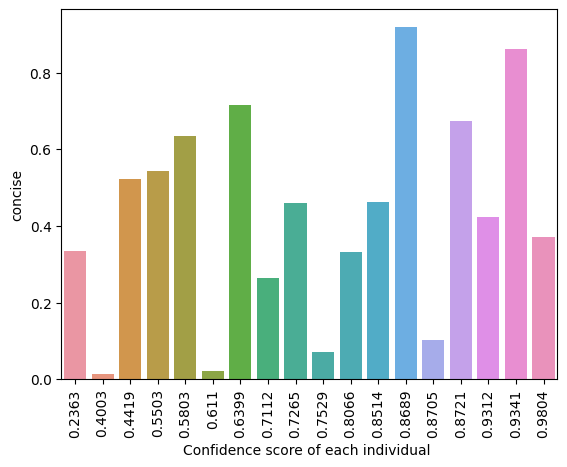

In [82]:
sns.barplot(x = np.round(df1['positive'],decimals=4),y = np.round(df1['concise'],decimals=4))
plt.xlabel('Confidence score of each individual ')
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0.286'),
  Text(1, 0, '0.4302'),
  Text(2, 0, '0.4651'),
  Text(3, 0, '0.5395'),
  Text(4, 0, '0.5688'),
  Text(5, 0, '0.601'),
  Text(6, 0, '0.6793'),
  Text(7, 0, '0.7291'),
  Text(8, 0, '0.7743'),
  Text(9, 0, '0.8054'),
  Text(10, 0, '0.8467'),
  Text(11, 0, '0.8931'),
  Text(12, 0, '0.8985'),
  Text(13, 0, '0.8987'),
  Text(14, 0, '0.9027'),
  Text(15, 0, '0.9336'),
  Text(16, 0, '0.976'),
  Text(17, 0, '0.9809')])

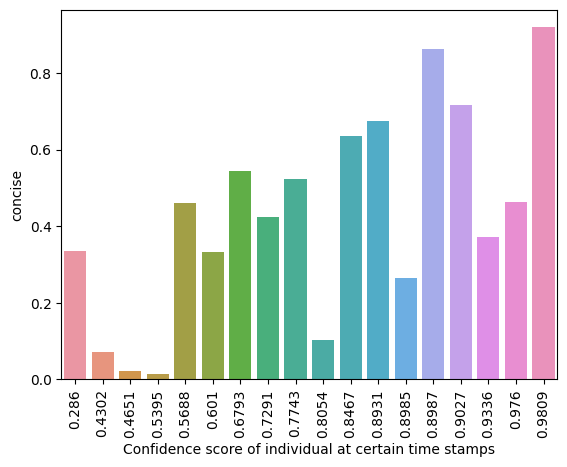

In [143]:
sns.barplot(x = np.round(df1['confident'],decimals=4),y = np.round(df1['concise'],decimals=4))
plt.xlabel('Confidence score of individual at certain time stamps')
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0.2363'),
  Text(1, 0, '0.4003'),
  Text(2, 0, '0.4419'),
  Text(3, 0, '0.5503'),
  Text(4, 0, '0.5803'),
  Text(5, 0, '0.611'),
  Text(6, 0, '0.6399'),
  Text(7, 0, '0.7112'),
  Text(8, 0, '0.7265'),
  Text(9, 0, '0.7529'),
  Text(10, 0, '0.8066'),
  Text(11, 0, '0.8514'),
  Text(12, 0, '0.8689'),
  Text(13, 0, '0.8705'),
  Text(14, 0, '0.8721'),
  Text(15, 0, '0.9312'),
  Text(16, 0, '0.9341'),
  Text(17, 0, '0.9804')])

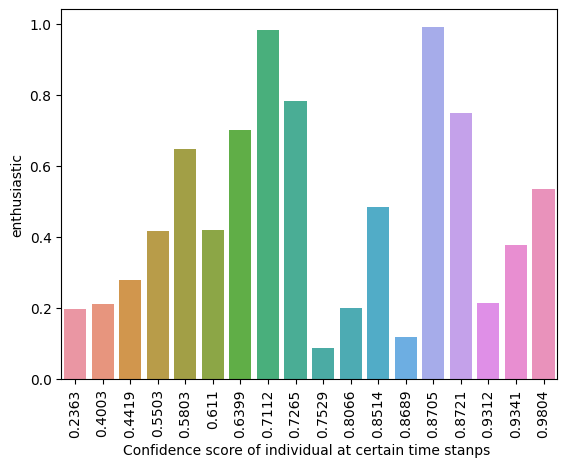

In [142]:
sns.barplot(x = np.round(df1['positive'],decimals=4),y = np.round(df1['enthusiastic'],decimals=4))
plt.xlabel('Confidence score of individual at certain time stanps ')
plt.xticks(rotation = 'vertical')

In [62]:
df1_new = df1[(df1['positive']>0.7) & (df1['confident']>0.75) & (df1['concise']>0.40)]

In [64]:
df1_new.shape

(4, 21)

In [42]:
corpus = []
df1_new = df1.loc[(df1['positive'] > 0.7) & (df1['confident'] > 0.75) & (df1['concise'] > 0.40)]
for msg in df1_new['trans_text'].tolist():

        for word in msg.split():
            corpus.append(word)

In [25]:
from collections import Counter

In [54]:
t1 = pd.DataFrame(data=Counter(corpus1).most_common(30))[0]
t2 = pd.DataFrame(data=Counter(corpus1).most_common(30))[1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'research'),
  Text(1, 0, 'consist'),
  Text(2, 0, 'What'),
  Text(3, 0, 'set'),
  Text(4, 0, 'apart'),
  Text(5, 0, 'is'),
  Text(6, 0, 'expertis'),
  Text(7, 0, 'bring'),
  Text(8, 0, 'which'),
  Text(9, 0, 'testament'),
  Text(10, 0, 'work'),
  Text(11, 0, 'patent'),
  Text(12, 0, 'publication'),
  Text(13, 0, 'best'),
  Text(14, 0, 'award'),
  Text(15, 0, 'at'),
  Text(16, 0, 'receiv'),
  Text(17, 0, 'After'),
  Text(18, 0, '12th'),
  Text(19, 0, 'develop'),
  Text(20, 0, 'are'),
  Text(21, 0, 'main'),
  Text(22, 0, 'excel'),
  Text(23, 0, 'academ')])

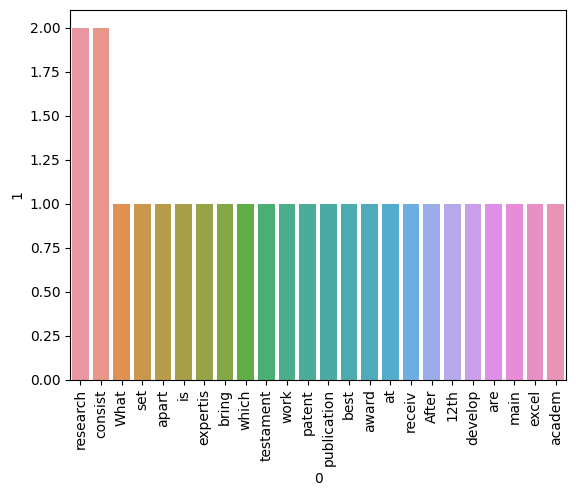

In [55]:
sns.barplot(x = t1,y = t2)
plt.xticks(rotation = 'vertical')

In [45]:
new_corpus = []
df1_new = df1.loc[~((df1['positive'] > 0.7) & (df1['confident'] > 0.75) & (df1['concise'] > 0.40))]
for msg in df1_new['trans_text'].tolist():

        for word in msg.split():
            new_corpus.append(word)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'and'),
  Text(1, 0, 'to'),
  Text(2, 0, 'from'),
  Text(3, 0, 'in'),
  Text(4, 0, 'I'),
  Text(5, 0, 'of'),
  Text(6, 0, 'a'),
  Text(7, 0, 'this'),
  Text(8, 0, 'with'),
  Text(9, 0, 'an'),
  Text(10, 0, 'as'),
  Text(11, 0, 'help'),
  Text(12, 0, 'am'),
  Text(13, 0, 'postgradu'),
  Text(14, 0, 'have'),
  Text(15, 0, 'my'),
  Text(16, 0, 'biotechnolog'),
  Text(17, 0, 'come'),
  Text(18, 0, 'ad'),
  Text(19, 0, 'abil'),
  Text(20, 0, 'pay'),
  Text(21, 0, 'attent'),
  Text(22, 0, 'bake'),
  Text(23, 0, 'also'),
  Text(24, 0, 'new'),
  Text(25, 0, 'me'),
  Text(26, 0, 'hello'),
  Text(27, 0, 'jeffrey'),
  Text(28, 0, 'shepherd'),
  Text(29, 0, 'i')])

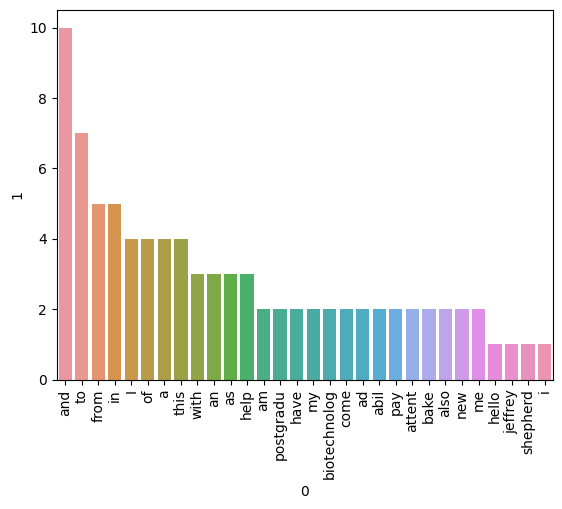

In [51]:
sns.barplot(x = t1_new,y = t2_new)
plt.xticks(rotation = 'vertical')

In [50]:
t1_new = pd.DataFrame(data=Counter(new_corpus1).most_common(30))[0]
t2_new = pd.DataFrame(data=Counter(new_corpus1).most_common(30))[1]

In [49]:
from collections import Counter
intersection = Counter(new_corpus) & Counter(corpus)
multiset_a_without_common = Counter(corpus) - intersection
multiset_b_without_common = Counter(new_corpus) - intersection
corpus1 = list(multiset_a_without_common.elements())
new_corpus1 = list(multiset_b_without_common.elements())

Merging the important information such as mean value and median value from the given datasets

In [108]:
median_list = []
mean_list=[]
columns = df1.describe().columns.tolist()
for i in l:
    median_list.append(i.describe().median().to_dict())
    mean_list.append(i.describe().mean().to_dict())

In [117]:
index = df1.describe().index.tolist()

In [111]:
median_list

[{'id': 8.5,
  'seek': 2687.234344663402,
  'start': 33.33850450355174,
  'end': 36.11301213008301,
  'temperature': 0.0,
  'avg_logprob': -0.23756336708036435,
  'compression_ratio': 1.6588890730110306,
  'no_speech_prob': 0.7910322722875409,
  'positive': 0.724451855238941,
  'negative': 0.1480737234395389,
  'neutral': 0.15266370685357183,
  'confident': 0.7618410752879249,
  'hesitant': 0.4464820025281774,
  'concise': 0.4354478476776017,
  'enthusiastic': 0.44269865502913797,
  'speech_speed': 3.1239885310392372},
 {'id': 9.0,
  'seek': 2919.519505030503,
  'start': 35.87904317237749,
  'end': 38.300619297574336,
  'temperature': 0.0,
  'avg_logprob': -0.2840980012618487,
  'compression_ratio': 1.674936386768448,
  'no_speech_prob': 0.19977565771458966,
  'positive': 0.7135860512131138,
  'negative': 0.10544180378660947,
  'neutral': 0.16775151138733088,
  'confident': 0.728936333405344,
  'hesitant': 0.4797381784362522,
  'concise': 0.49543612313113716,
  'enthusiastic': 0.462210

In [120]:
c_mean = pd.DataFrame(data=mean_list)

In [121]:
c_mean

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,9.292317,2751.225253,36.312404,40.275753,2.250,2.029361,3.477066,2.786119,2.791350,2.389630,2.371992,2.809311,2.632693,2.621212,2.643625,4.655616
1,9.828414,2929.675929,39.179432,42.325155,2.375,2.145300,3.613021,2.565362,2.935910,2.474867,2.523749,2.902356,2.744883,2.769769,2.800881,4.887498
2,14.653247,3256.821209,44.434246,46.880442,3.500,3.268923,4.730459,3.739054,3.954385,3.770213,3.645055,3.966869,3.962690,3.835610,3.886295,6.089963
3,9.828414,3032.381529,41.586426,45.100765,2.375,2.166204,3.558205,2.613600,2.880466,2.535128,2.526811,2.846484,2.819875,2.710992,2.741514,4.505129
4,8.756219,1938.587005,30.370906,34.045266,2.125,1.904622,3.341789,2.337597,2.596860,2.329909,2.270479,2.577638,2.515132,2.471030,2.451070,4.356702
5,9.292317,2786.141782,36.580448,40.012588,2.250,2.016588,3.388306,2.494559,2.799514,2.388736,2.382560,2.773804,2.642506,2.557599,2.664776,4.176851
6,6.611805,2863.515653,36.611455,41.504137,1.625,1.355131,2.730705,1.727908,2.189681,1.770638,1.756075,2.149581,2.015139,1.961752,2.016252,3.392153
7,8.220119,2942.745349,39.943651,43.915558,2.000,1.785546,3.185096,2.266767,2.473124,2.162354,2.177872,2.444160,2.418215,2.289196,2.372412,4.227918
8,4.467327,2312.080898,26.102537,33.093727,1.125,0.896431,2.337695,1.542922,1.601679,1.345950,1.259375,1.579476,1.570256,1.431907,1.555254,3.684484
9,8.756219,2791.047358,38.066186,41.435695,2.125,1.895876,3.336115,2.345509,2.575178,2.359353,2.280164,2.612208,2.540559,2.454463,2.389211,4.657638


In [125]:
c_median = pd.DataFrame(data=median_list)

In [126]:
c_median

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,8.5,2687.234345,33.338505,36.113012,0.0,-0.237563,1.658889,0.791032,0.724452,0.148074,0.152664,0.761841,0.446482,0.435448,0.442699,3.123989
1,9.0,2919.519505,35.879043,38.300619,0.0,-0.284098,1.674936,0.199776,0.713586,0.105442,0.167752,0.728936,0.479738,0.495436,0.462211,3.256683
2,13.5,3378.284835,40.231983,41.939982,0.0,-0.296338,1.628420,0.255247,0.574314,0.257736,0.169950,0.635380,0.605269,0.399388,0.437083,3.471818
3,9.0,3068.973485,37.944650,40.498851,0.0,-0.275304,1.584427,0.259730,0.663043,0.158251,0.176619,0.642008,0.581111,0.404885,0.396652,2.730702
4,8.0,2285.848021,27.761861,30.240000,0.0,-0.285582,1.599309,0.220328,0.648368,0.180901,0.183025,0.620162,0.500734,0.378994,0.395135,2.797559
5,8.5,2732.900461,33.721793,36.095352,0.0,-0.248210,1.631968,0.263133,0.700261,0.139798,0.136488,0.708997,0.491073,0.362092,0.429028,2.628700
6,6.0,2816.793380,34.465822,38.858462,0.0,-0.333474,1.570843,0.113355,0.748492,0.147925,0.131264,0.714607,0.514286,0.357079,0.397698,2.314324
7,7.5,2947.606396,37.604603,40.122231,0.0,-0.265397,1.578446,0.275142,0.618011,0.173376,0.195480,0.563305,0.499935,0.319613,0.413699,2.859488
8,4.0,2388.888889,24.632372,29.097130,0.0,-0.300102,1.624771,0.505501,0.630634,0.224664,0.153436,0.598666,0.598843,0.342365,0.450909,3.387191
9,8.0,2734.630609,34.778863,37.222779,0.0,-0.285740,1.656915,0.221948,0.591653,0.213674,0.194627,0.676138,0.485429,0.386988,0.304154,3.208766


Used graphs for analysis of trends

In [164]:
arr = [i for i in range(1,11)]

In [165]:
arr

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

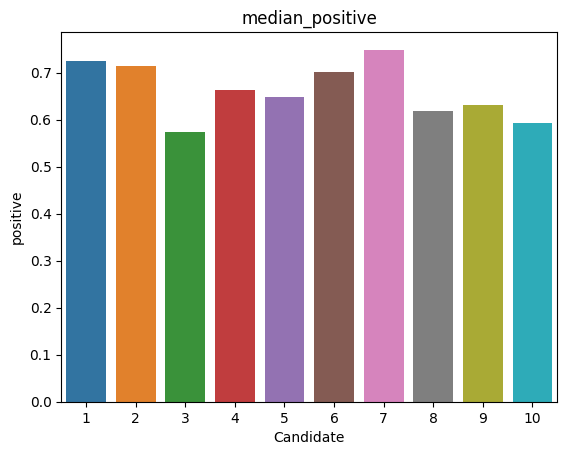

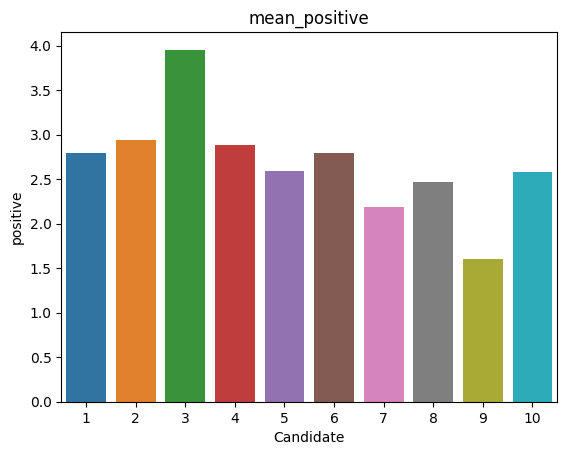

In [167]:
plt.title('median_positive')
sns.barplot(y = c_median['positive'],x=arr)
plt.xlabel('Candidate')
plt.show()
plt.title('mean_positive')
sns.barplot(y = c_mean['positive'],x=arr)
plt.xlabel('Candidate')
plt.show()

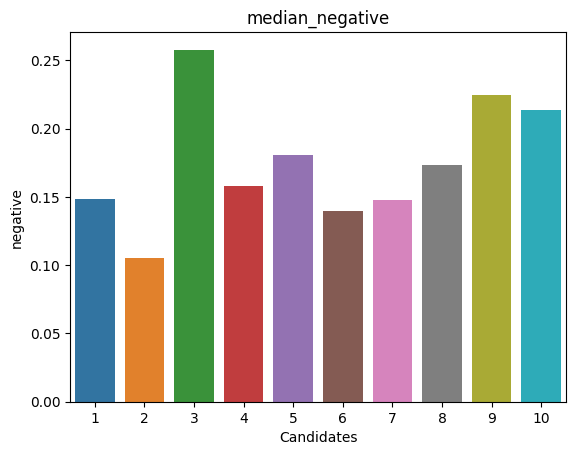

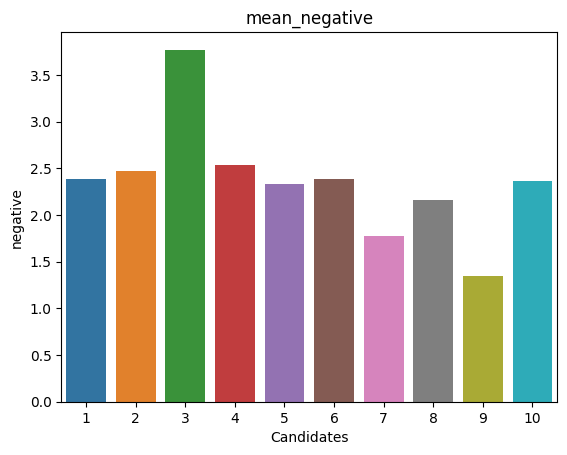

In [168]:
plt.title('median_negative')
sns.barplot(y = c_median['negative'],x=arr)
plt.xlabel('Candidates')
plt.show()
plt.title('mean_negative')
sns.barplot(y = c_mean['negative'],x=arr)
plt.xlabel('Candidates')
plt.show()

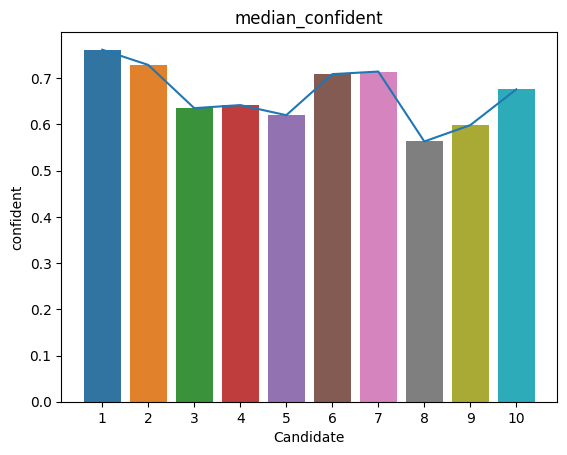

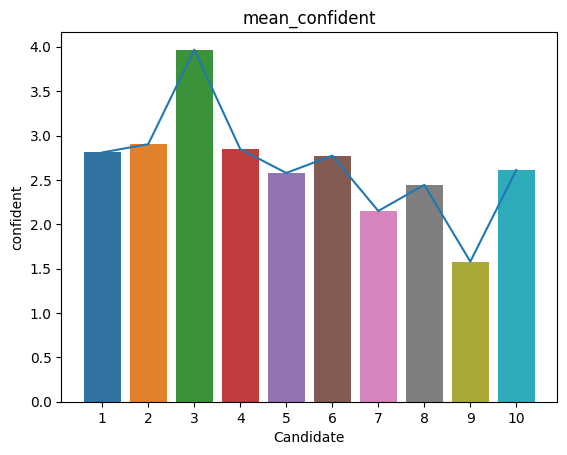

In [172]:
plt.title('median_confident')
sns.barplot(y = c_median['confident'],x=arr)
sns.lineplot(y = c_median['confident'],x=c_mean.index.tolist())
plt.xlabel('Candidate')
plt.show()
plt.title('mean_confident')
sns.barplot(y = c_mean['confident'],x=arr)
sns.lineplot(y = c_mean['confident'],x=c_median.index.tolist())
plt.xlabel('Candidate')
plt.show()

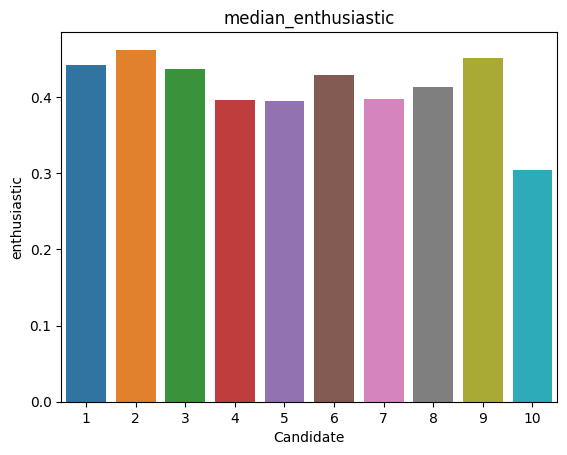

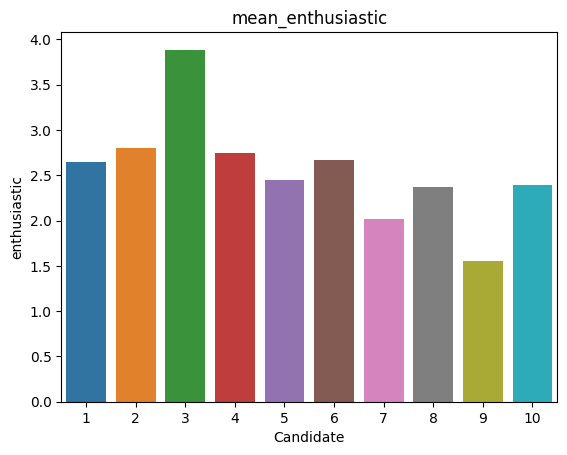

In [169]:
plt.title('median_enthusiastic')
sns.barplot(y = c_median['enthusiastic'],x=arr)
plt.xlabel('Candidate')
plt.show()
plt.title('mean_enthusiastic')
sns.barplot(y = c_mean['enthusiastic'],x=arr)
plt.xlabel('Candidate')
plt.show()

<Axes: >

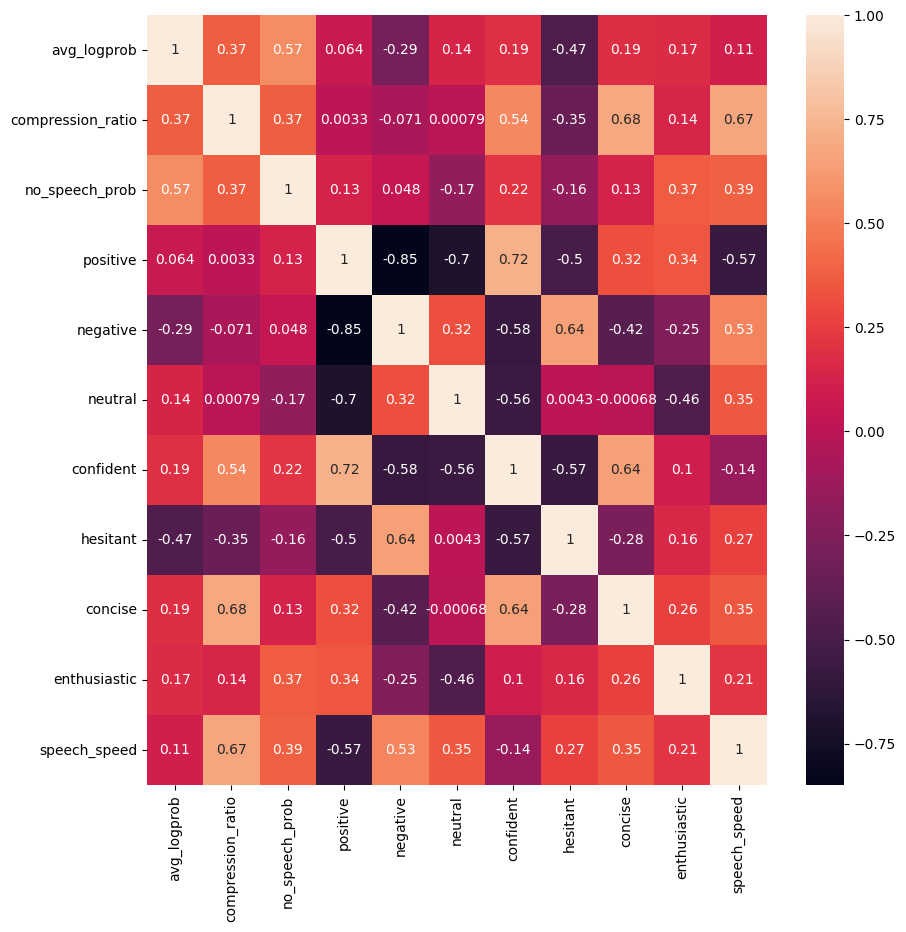

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(data=c_median.select_dtypes(include=[int,float]).iloc[:,5:].corr(),annot = True)
